In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc, col, max, struct
import matplotlib.pyplot as plts

In [2]:
spark = SparkSession.builder.appName('start_app').getOrCreate()

In [3]:
listening_csv_path = "files/listenings.csv"
listening_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(listening_csv_path)

In [ ]:
listening_df.show()

In [5]:
print(listening_df.columns)

['user_id', 'date', 'track', 'artist', 'album']


In [6]:
listening_df = listening_df.drop('date')

In [7]:
listening_df = listening_df.na.drop()

In [8]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

In [9]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



In [10]:
shape = (listening_df.count(), len(listening_df.columns))
print(shape)

(13758905, 4)


In [11]:
q2 = listening_df.select('user_id').filter(listening_df.artist == 'Rihanna').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



In [12]:
q3 = listening_df.select('artist', 'track').groupby('artist', 'track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q3.show()

+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



In [13]:
q4 = listening_df.select('artist', 'track').filter(listening_df.artist == 'Rihanna').groupby('artist', 'track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q4 = listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

In [14]:
q5 = listening_df.select('artist','album').groupby('artist','album').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q5.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



In [15]:
genre_csv_path = 'files/genre.csv'
genre_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(genre_csv_path)

In [16]:
data = listening_df.join(genre_df, on = ['artist'], how = 'inner')
q6 = data.select('user_id').filter(data.genre == 'pop').groupby('user_id').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



In [17]:
q7 = data.select('genre').groupby('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



In [18]:
q8_1 = data.select('user_id', 'genre').groupby('user_id', 'genre').agg(count('*').alias('count')).orderBy(desc('count'))
q8_1.show()

+--------------+--------------------+-----+
|       user_id|               genre|count|
+--------------+--------------------+-----+
|     mrsands91|                 r&b|  952|
|     Benjiibop|                 r&b|  950|
|     sbrooks91|                 r&b|  915|
|       Pete557|                 r&b|  836|
|      _Seichi_|                 r&b|  765|
|     b00g13man| Associated Perfo...|  745|
|       Kaigamo|                 r&b|  741|
|   Kojobimpong|                jazz|  722|
| dejectedxcore|            synthpop|  665|
|   pussycatboi|                 r&b|  664|
|       Munross| Associated Perfo...|  645|
|     chazrules|                 r&b|  641|
|     LizzieJoe|                jazz|  640|
|lennyautomatik| Associated Perfo...|  625|
|   NaomiWaters|                 r&b|  620|
|   elizawright|                 r&b|  605|
|         oleuk|    Stephen Merchant|  600|
|        jhnhtt| Associated Perfo...|  600|
|    dragula100|                rock|  599|
|  WarrenPearce|                

In [19]:
q8_2 = q8_1.groupby('user_id').agg(max(struct(col('count'), col('genre'))).alias('max')).select(col('user_id'), col('max.genre'))
q8_2.show()

+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|      --Shinn--|       rock|
|        -Gemma-|british pop|
|         -wasp-|       rock|
|   -x-kelsey-x-|        pop|
|      00fieldsy|       rock|
|     01higginsr|    hip hop|
|        0Chris0|    hip hop|
|    12thmarquis|       rock|
|           1936|        pop|
|        1Marley|        r&b|
|       1chris90|        pop|
|     200percent|       folk|
|        20113hz|        pop|
|20thCenturyGirl|       rock|
|        247flix|   synthpop|
|         2AmcD7|       rock|
|           2key|    hip hop|
|         2moo2u| indie rock|
|        3stripe| electronic|
|            462|   shoegaze|
+---------------+-----------+
only showing top 20 rows



In [20]:
q9 = genre_df.select('genre').filter((col('genre') == 'pop') | (col('genre') == 'rock') | (col('genre') == 'metal') | (col('genre') == 'hip hop')).groupby('genre').agg(count('genre').alias('count'))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



In [21]:
q9_list = q9.collect()
lables = [row['genre'] for row in q9_list]
counts = [row['count'] for row in q9_list]

<BarContainer object of 4 artists>

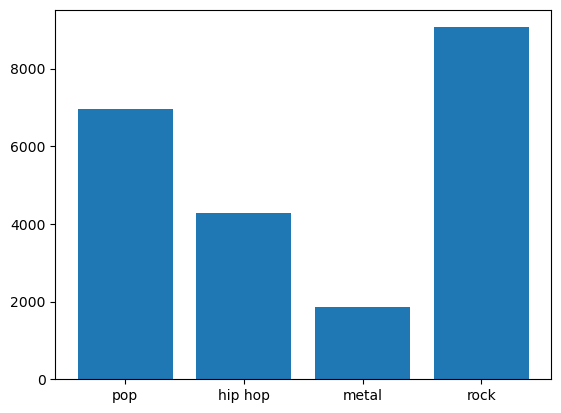

In [22]:
plts.bar(lables, counts)